<a href="https://colab.research.google.com/github/AlonVery/Dataset-s_for_ML/blob/main/%D0%AD%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Статьи и источники информации:

https://ceur-ws.org/Vol-2597/paper-14.pdf

http://paper.ijcsns.org/07_book/201407/20140721.pdf

http://arxiv.org/pdf/1805.03409

**Датасеты которые подходят для обучения модели обнаруживать аномалии и типы атак в локальной сети EDGE and IOT:**

Варианты датасетов на обучение моделей:

https://github.com/dangnh0611/kdd99_ids

http://archive.ics.uci.edu/dataset/442/detection+of+iot+botnet+attacks+n+baiot

In [ ]:
!pip install scapy
!pip install mocket
!pip install lime
!pip install shap
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=f65164ec4815a70efb436ec15e988830b41048f488db947a3334a576bc498eac
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 8.0 MB/s eta 0:00:00
  Created wheel for mocket: filename=mocket-3.12.6-py3-none-any.whl size=21949 sha256=5544cf189082a416d0f7d0a1ef7acce88bf4affb09522742f2f4f15712d070fb
  Stored in directory: /root/.cache/pip/wheels/9d/2b/23/a93d260c953d56ffbf2a84cc52c78690b2ef85b002e1402afe
Successfully built mocket
     ━━━━━━━━

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import joblib
from joblib import dump, load
import pprint
import lime
import lime.lime_tabular
import shap
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import socket
from scapy.all import sniff
from unittest.mock import patch
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Загрузка датасета KDD Cup 99
url = "https://raw.githubusercontent.com/stepka123/basic-NL-SA/main/KDDTrain%2B.txt"

# Указание имен столбцов для данных
col_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack', 'level']
data = pd.read_csv(url, header=None, names=col_names)

# Удаляем столбец 'level', который не требуется
data = data.drop(['level'], axis=1)

# Функция для замены меток атак на соответствующий класс атаки
def change_label(data):
    data.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    data.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    data.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    data.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

# Применение функции для замены меток атак на соответствующий класс атаки
change_label(data)
# Проверка уникальных значений в столбце 'attack'
data.attack.unique()
# Вывод первых строк данных для проверки
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
#чистим будущие данные от NaN/ Null values

def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "data needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep]


#Дропаем дубликаты
df_dpl = data.duplicated().sum()
print("Дубликаты: ",df_dpl)
data.drop_duplicates(inplace=True)

Дубликаты:  9


In [ ]:
# Создание экземпляров LabelEncoder для каждого категориального признака
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
# Обучение каждого LabelEncoder на соответствующем столбце данных и кодирование категориальных признаков
le_protocol_type = le1.fit(data['protocol_type'])
le_service = le2.fit(data['service'])
le_flag = le3.fit(data['flag'])
le_attack = le4.fit(data['attack'])
# Преобразование категориальных признаков в числовые значения с использованием обученных LabelEncoder
data['protocol_type'] = le_protocol_type.transform(data['protocol_type'])
data['service'] = le_service.transform(data['service'])
data['flag'] = le_flag.transform(data['flag'])
data['attack'] = le_attack.transform(data['attack'])

# Разделение данных на признаки (X_train) и целевую переменную (y_train)
y_train= data[['attack']]
X_train= data.drop(labels=['attack'], axis=1)
# Вывод размерности данных для проверки
print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)
# Разделение данных на обучающий и тестовый наборы с использованием функции train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

# Задание имен классов для целевой переменной
target_names = ['normal', 'Dos', 'Probe', 'R2L', 'U2R']

X_train has shape: (125964, 41) 
y_train has shape: (125964, 1)


In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [ ]:
# Разделение данных на признаки и целевую переменную
X = data.drop('attack', axis=1)
y = data['attack']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Подбираем модель. Оцениваем 3 разные.

In [ ]:
# Инициализация и обучение модели SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = svm_model.predict(X_test)

# Оценка модели
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 9174     2     0     0    37]
 [    2  1982     0     0   320]
 [    5     2   168     1    29]
 [    0     0     1     6     5]
 [   90   184    61     0 13124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9213
           1       0.91      0.86      0.89      2304
           2       0.73      0.82      0.77       205
           3       0.86      0.50      0.63        12
           4       0.97      0.98      0.97     13459

    accuracy                           0.97     25193
   macro avg       0.89      0.83      0.85     25193
weighted avg       0.97      0.97      0.97     25193

Accuracy: 0.9706664549676497


In [ ]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 22, 5), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Предсказание меток классов для тестового набора данных
y_pred_mlp = mlp.predict(X_test_scaled)

# Оценка модели
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Оценка точности модели
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy_mlp)


Confusion Matrix:
[[ 9202     2     0     0     9]
 [    1  2296     0     0     7]
 [    0     0   186     1    18]
 [    0     0     2     6     4]
 [    9    16     7     1 13426]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9213
           1       0.99      1.00      0.99      2304
           2       0.95      0.91      0.93       205
           3       0.75      0.50      0.60        12
           4       1.00      1.00      1.00     13459

    accuracy                           1.00     25193
   macro avg       0.94      0.88      0.90     25193
weighted avg       1.00      1.00      1.00     25193

Accuracy: 0.9969435954431787


In [ ]:
# Инициализация и обучение модели перцептрона
perceptron_model = Perceptron(random_state=48)
perceptron_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_perceptron = perceptron_model.predict(X_test)

# Оценка модели
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_perceptron))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_perceptron))

# Оценка точности модели
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy:", accuracy_perceptron)


Confusion Matrix:
[[ 9063     7     0     0   143]
 [   22  2002     0     6   274]
 [    0     5    81    42    77]
 [    0     0     0     0    12]
 [  112   520    30    54 12743]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9213
           1       0.79      0.87      0.83      2304
           2       0.73      0.40      0.51       205
           3       0.00      0.00      0.00        12
           4       0.96      0.95      0.95     13459

    accuracy                           0.95     25193
   macro avg       0.69      0.64      0.66     25193
weighted avg       0.95      0.95      0.95     25193

Accuracy: 0.9482395903624022


In [ ]:
# Имя файла для сохранения модели
filename = 'best_model.sav'

# Сохранение модели в файл
pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/stepka123-KDD_Dataset/KDDTrain%2B_20Percent.txt')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

# Присваивание названий столбцов датасету df_test
df_test.columns = columns
# Удаление столбцов 'attack' и 'level', которые не требуются для тестирования модели
df_test = df_test.drop(['attack', 'level'], axis=1)

In [ ]:
def intrusion_check(packet):
    # Преобразование категориальных признаков в числовые значения с использованием предварительно обученных LabelEncoder
    packet[1] = le_protocol_type.transform([packet[1]])[0]
    packet[2] = le_service.transform([packet[2]])[0]
    packet[3] = le_flag.transform([packet[3]])[0]

    # Прогнозирование класса атаки для пакета с использованием загруженной модели
    pred = loaded_model.predict(np.reshape(packet, (1, 41)))

    # Преобразование числового значения предсказанного класса обратно в исходную метку атаки
    predicted = le_attack.inverse_transform(pred)

    return predicted[0]


def capture_packet(count=float('inf')):
    filtered_packets = []

    def handle_sniffed_packet(packet):
        # Выбор случайного номера строки из тестового датасета
        num = random.randint(0, 11849)

        # Проверка пакета на наличие вторжения с использованием функции intrusion_check
        check = intrusion_check(list(df_test.iloc[num]))

        # Если пакет безопасен (не является атакой), добавляем его в список отфильтрованных пакетов
        if check == 'normal':
            filtered_packets.append(packet)
            print(f'Packet Safe, From [{packet.src}] To [{packet.dst}]')
        else:
            # Если обнаружено вторжение, выдаем предупреждение
            print(f'Caution! Found {check}, From [{packet.src}] To [{packet.dst}]')

    # Начало захвата пакетов с использованием функции sniff
    sniff(prn=handle_sniffed_packet, count=count)

    return filtered_packets



In [ ]:
# Загрузка модели из файла
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Capture 20 packets and receive the safe packets
packets = capture_packet()

Caution! Found Dos, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:c7:07:8a:77]
Caution! Found Probe, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:c7:07:8a:77]
Caution! Found Probe, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Dos, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:c7:07:8a:77]
Caution! Found Dos, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:c7:07:8a:77]
Caution! Found Dos, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:c7:07:8a:77]
Caution! Found Probe, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Dos, From [02:42:c7:07:8a:77] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02

Accuracy: 0.9969435954431787
Recall: 0.9969435954431787
F1 Score: 0.9968993043191637


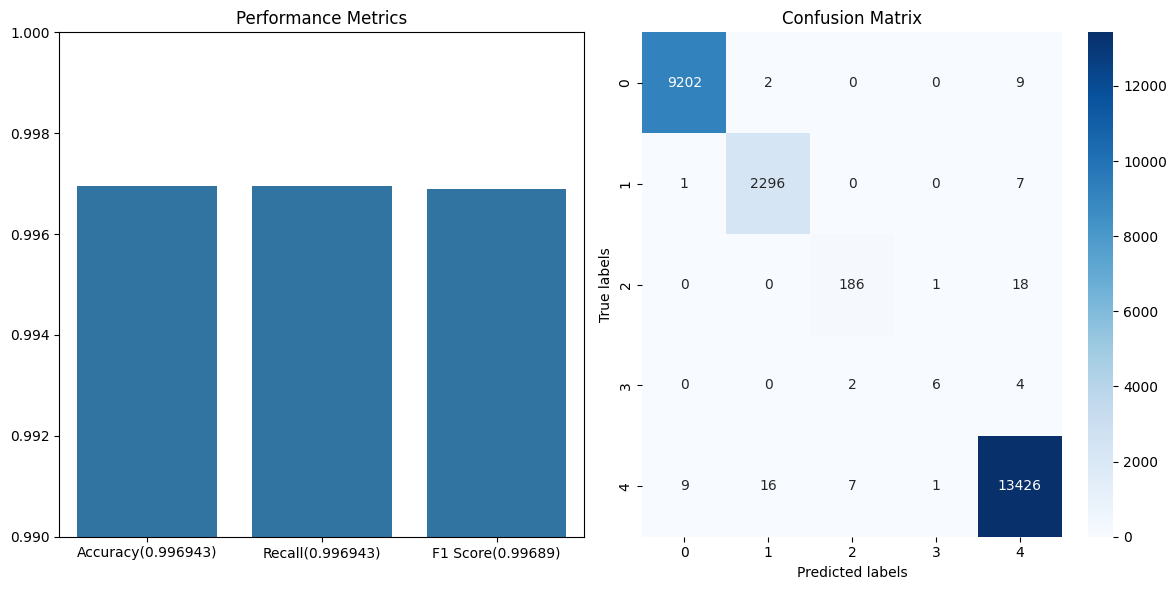

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисление точности
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy_mlp)

# Calculate recall score
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
print("Recall:", recall_mlp)

# Calculate F1-score
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print("F1 Score:", f1_mlp)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_mlp)

# Построение графика для точности, полноты и F1-меры
plt.figure(figsize=(12, 6))

# Точность, полнота и F1-мера
plt.subplot(1, 2, 1)
metrics = ['Accuracy(0.996943)', 'Recall(0.996943)', 'F1 Score(0.99689)']
values = [accuracy_mlp, recall_mlp, f1_mlp]
sns.barplot(x=metrics, y=values)
plt.title('Performance Metrics')
plt.ylim(0.990000, 1.000000)  # Измененный диапазон отображения
# Матрица ошибок
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()
